In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt

from utils_tail_probs import softmax
from utils_tail_probs import compute_tail_index
from typing import Literal

In [6]:
def load_epoch_log_probs(steps: int, split: Literal["train", "test"]):
    return json.load(
        open(
            f"../results/xsum_analysis_by_250/{split}/bart-base_data_xsum_checkpoint-{steps}_xsum_50_rows.json",
            "r",
        )
    )["beam_score_log_probs"]


def turn_log_prob_dict_into_np_array(
    dict_of_log_probs_by_beam_idx: dict[str, list[float]]
):
    log_probs_by_idx = np.array(
        [
            dict_of_log_probs_by_beam_idx[str(idx)]
            for idx in range(len(dict_of_log_probs_by_beam_idx.keys()))
        ]
    )
    log_probs_by_sample = log_probs_by_idx.T
    return log_probs_by_sample

In [7]:
tail_index_mean_train, tail_index_std_train = list[float](), list[float]()
tail_index_mean_test, tail_index_std_test = list[float](), list[float]()

for i in range(250, 2001, 250):
    log_probs_train = turn_log_prob_dict_into_np_array(load_epoch_log_probs(i, "train"))
    log_probs_test = turn_log_prob_dict_into_np_array(load_epoch_log_probs(i, "test"))

    tail_indices_train = compute_tail_index(log_probs_train)
    tail_indices_test = compute_tail_index(log_probs_test)

    tail_index_mean_train.append(float(np.mean(tail_indices_train)))
    tail_index_std_train.append(float(np.std(tail_indices_train)))
    tail_index_mean_test.append(float(np.mean(tail_indices_test)))
    tail_index_std_test.append(float(np.std(tail_indices_test)))

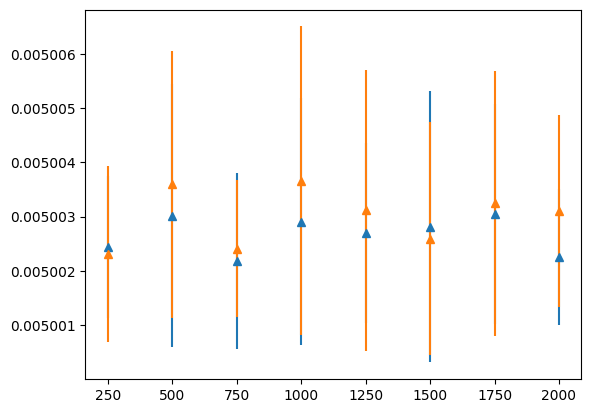

In [9]:
plt.errorbar(
    list(range(250, 2001, 250)),
    tail_index_mean_train,
    tail_index_std_train,
    linestyle="None",
    marker="^",
)

plt.errorbar(
    list(range(250, 2001, 250)),
    tail_index_mean_test,
    tail_index_std_test,
    linestyle="None",
    marker="^",
)

plt.show()